# Ejercicio 2

## a) Matriz de transición de estados

Para resolver este ejercicio vamos a considerar que los eventos:
- A = llega una nueva solicitud
- B = una solicitud es procesada y deja el sistema

son eventos completamente independientes.

De ésta manera podemos descomponer a los estados del servidor según cuántas solicitudes se están procesando:

a) Tomando estos estados se puede armar una matriz de transición de estados

    M = | P0->0   P0->1   P0->2   P0->3  P0->4  ... |
        | P1->0   P1->1   P1->2   P1->3  P1->4  ... |
        | P2->0   P2->1   P2->2   P2->3  P2->4  ... |
        |  ...     ...     ...     ...    ...   ... |

    M = |   r       p       0       0      0    ... |
        |  r*q   r*s+p*q   p*s      0      0    ... |
        |   0      r*q    r*s+p*q  p*s     0    ... |
        |  ...     ...     ...     ...    ...   ... |

siendo:
- p=1/30 la probabilidad que llegue una nueva solicitud
- q=1/40 la probabilidad que termine de ser procesada y deje el sistema
- r=1-p
- s=1-q

Si hay solicitudes pendientes:
- La probabilidad que en el próximo estado haya una solicitud **menos** es r*q
- La probabilidad que en el próximo estado haya una solicitud **más** es p*s
- La probabilidad de quedar **igual** es r*s+p*q

Si no hay solicitudes pendientes:
- La probabilidad que en el próximo estado haya una solicitud **mas** es p
- La probabilidad de quedar **igual** es 1-p

## b) Simulación a lo largo de 1.000 segundos suponiendo que se comienza no procesando ninguna solicitur

In [28]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000  # 1.000 segundos en intervalos de 10 milisegundos

solicitudes_en_proceso = 0
estados = []
for i in range(N):
    # Agrego estado a historico
    estados.append(solicitudes_en_proceso)

    # probabilidad de terminar una solicitud en proceso
    if solicitudes_en_proceso > 0 and np.random.rand() < 1.0/30:
        solicitudes_en_proceso = solicitudes_en_proceso - 1

    # probabilidad de que ingrese una solicitud nueva
    if np.random.rand() < 1.0/40:
        solicitudes_en_proceso = solicitudes_en_proceso + 1

## c) Cantidad de solicitudes en el servidor en cada instante

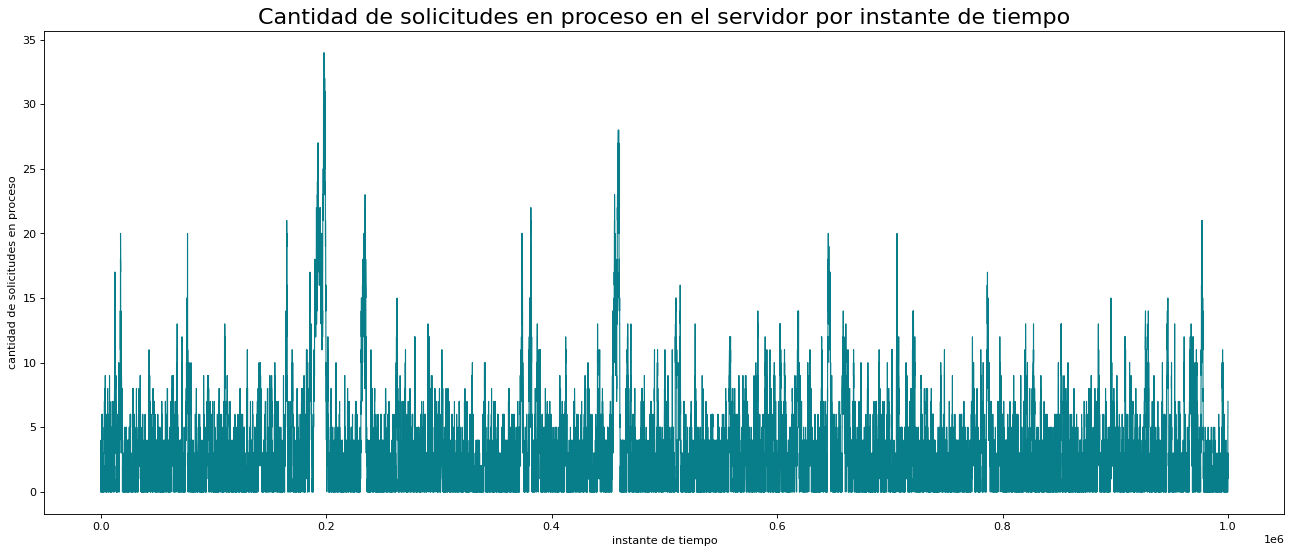

In [29]:
plt.figure(figsize=(20, 8), dpi=80)
plt.title('Cantidad de solicitudes en proceso en el servidor por instante de tiempo'.format(N), size=20)
plt.xlabel('instante de tiempo')
plt.ylabel('cantidad de solicitudes en proceso')
plt.plot(estados, color='#087E8B', linewidth=1.0)
plt.show()

## d) Histogramas de la cantidad de veces que se estuvo en cada estado

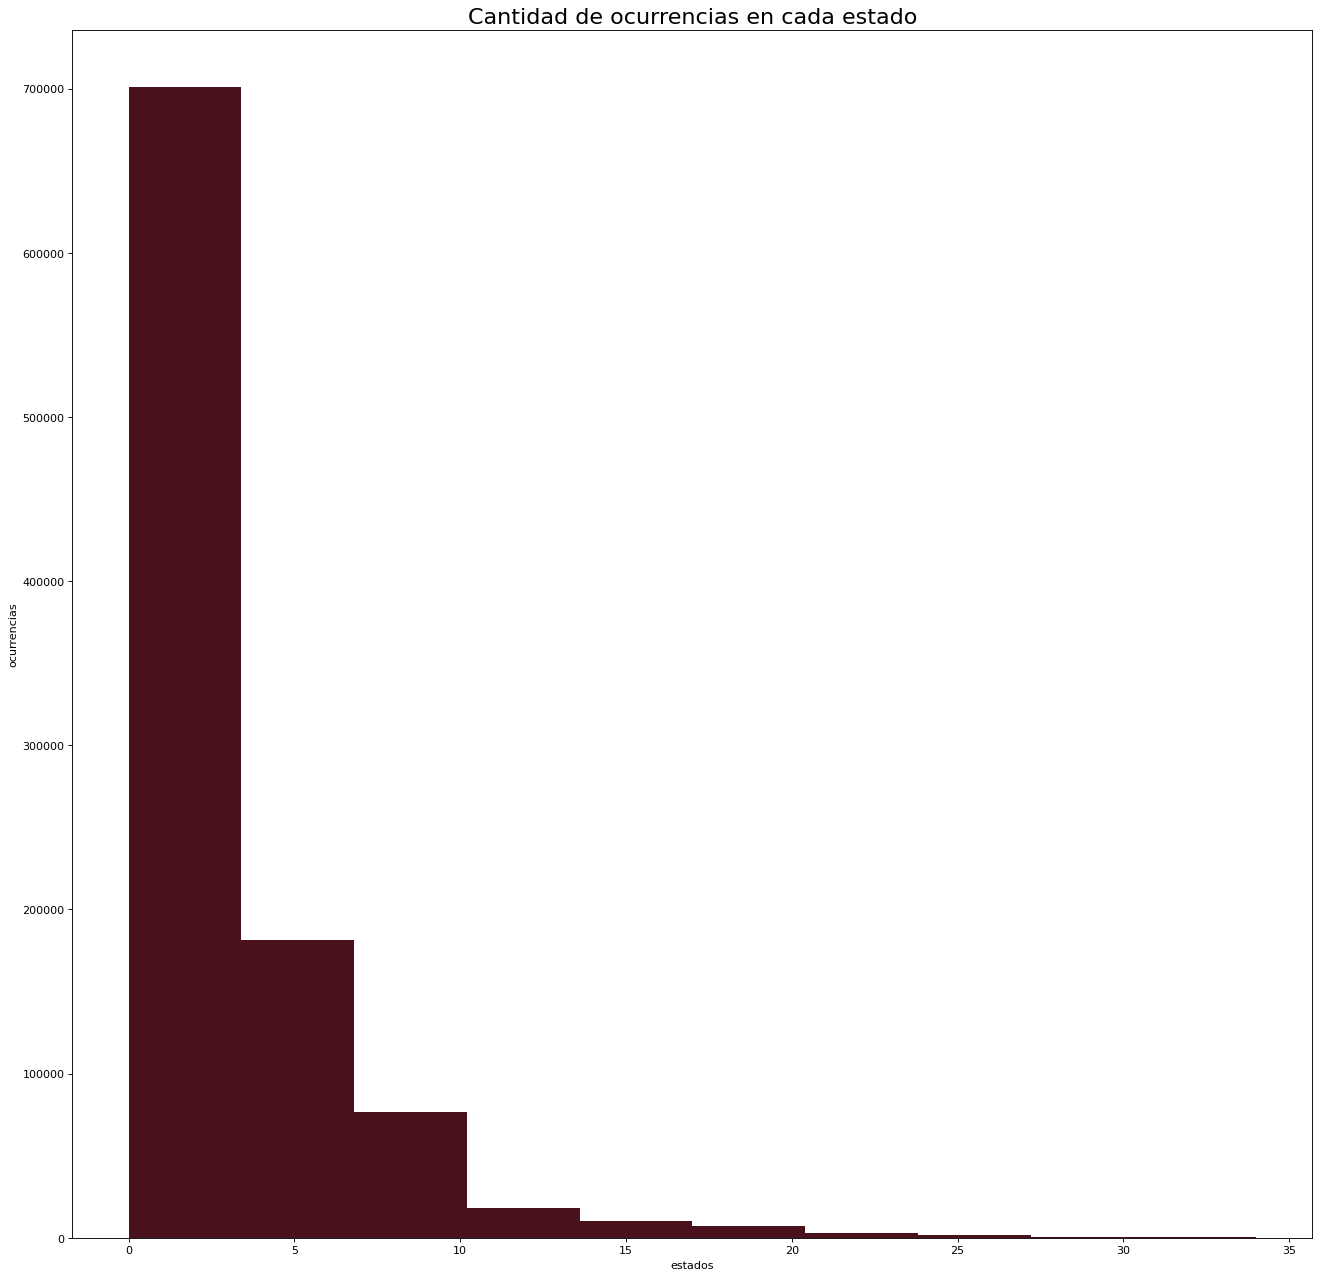

In [30]:
plt.figure(figsize=(20, 20), dpi=80)
plt.title('Cantidad de ocurrencias en cada estado'.format(N), size=20)
plt.xlabel('estados')
plt.ylabel('ocurrencias')
plt.hist(estados, color='#49111C', linewidth=1.0)
plt.show()

## e) % de tiempo que el servidor se encuentra sin procesar solicitudes

In [31]:
tiempo_sin_procesar_solicitudes = len(list(filter(lambda x: x == 0, estados))) / len(estados) * 100
tiempo_sin_procesar_solicitudes

25.081500000000002